#Name TAVISH SHARMA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

##Input dataset

In [ ]:
import pandas as pd
f = pd.read_csv('/content/drive/MyDrive/HRC/H2HBABBA2490.csv')
data = f

**Initial Split**

In [ ]:
testData = data[data.isOpen==1]#selecting the rows with isOpen=1 and creating main test set
data = data[data.isOpen==0]#with isOpen=0
data.drop(labels = ['isOpen'], inplace=True, axis = 1)#isOpen becomes a constant column so we drop it
testData.drop(labels = ['isOpen'], inplace=True, axis = 1)#isOpen becomes a constant column so we drop it

##Preprocessing

**Columns with NULL values**

In [ ]:
data.isna().sum()#printing the number of NULL values in each column

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    1
dtype: int64

In [ ]:
data.drop(labels = ['area_business'], inplace = True, axis = 1)#area business contains null values throughout hence is dropped
data = data[data.invoice_id.isnull()==False]#Only one row has null value hence we can drop it

**Constant Columns**

In [ ]:
data.nunique()#printing number of unique values in each column

business_code                 6
cust_number                1373
name_customer              3931
clear_date                  406
buisness_year                 2
doc_id                    39142
posting_date                424
document_create_date        427
document_create_date.1      424
due_in_date                 488
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         35642
baseline_create_date        432
cust_payment_terms           72
invoice_id                39142
dtype: int64

In [ ]:
data.drop(labels = ['document type','posting_id'],axis = 1, inplace = True)#both being constant columns we can drop these

**Columns with very high Variance**

In [ ]:
data.drop(labels = ['invoice_id','doc_id'],axis = 1, inplace=True)#invoice id and doc id both are primary keys hence dont add any value and can be dropped

In [ ]:
data.nunique()

business_code                 6
cust_number                1373
name_customer              3931
clear_date                  406
buisness_year                 2
posting_date                424
document_create_date        427
document_create_date.1      424
due_in_date                 488
invoice_currency              2
total_open_amount         35642
baseline_create_date        432
cust_payment_terms           72
dtype: int64

**Date Conversion**

In [ ]:
#changing date columns from string to date format
data['baseline_create_date']= pd.to_datetime(data['baseline_create_date'],format ="%Y%m%d")
data['document_create_date']= pd.to_datetime(data['document_create_date.1'],format ="%Y%m%d")
data.drop(labels = ['document_create_date.1'], axis =1, inplace = True)
data['due_in_date']= pd.to_datetime(data['due_in_date'],format ="%Y%m%d")
data['posting_date']= pd.to_datetime(data['posting_date'],format ="%Y-%m-%d")
data['clear_date'] = pd.to_datetime(data.clear_date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39999 non-null  object        
 1   cust_number           39999 non-null  object        
 2   name_customer         39999 non-null  object        
 3   clear_date            39999 non-null  datetime64[ns]
 4   buisness_year         39999 non-null  float64       
 5   posting_date          39999 non-null  datetime64[ns]
 6   document_create_date  39999 non-null  datetime64[ns]
 7   due_in_date           39999 non-null  datetime64[ns]
 8   invoice_currency      39999 non-null  object        
 9   total_open_amount     39999 non-null  float64       
 10  baseline_create_date  39999 non-null  datetime64[ns]
 11  cust_payment_terms    39999 non-null  object        
dtypes: datetime64[ns](5), float64(2), object(5)
memory usage: 4.0+ MB


**Sorting Based on Posting date**

In [ ]:
data = data.sort_values(by='posting_date')#sorting is done for properly segeregating test train and validation dataset

**Creating target column**

In [ ]:
data['ageing'] = data.clear_date - data.due_in_date #ageing here is our target column which denotes the delay in the due payment
y = data['ageing']
y = pd.DataFrame(y,columns = ['ageing'])
data.drop(labels = ['ageing'],axis = 1, inplace = True)
y['ageing'] = y['ageing'].dt.days.astype('int64')
y

,ageing
6944,6
19131,-5
19781,-5
48906,-5
15768,-5
...,...
24089,0
15072,-1
37991,0
11684,-1


**Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(data,y,test_size = 0.2, shuffle = False, random_state = 0)#using test train split to split into train set and temporary data
xVal , xTest, yVal , yTest = train_test_split(xTest,yTest, test_size = 0.5, shuffle = False, random_state = 0) #the temporary data is now split 50-50 into test and train dataset

In [ ]:
xTrain

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
6944,CA02,0140105785,SHOPPE,2019-01-18,2019.0,2018-12-30,2018-12-30,2019-01-12,CAD,36208.89,2019-01-02,CA10
19131,U001,0200769623,WAL-MAR llc,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,756.28,2018-12-30,NAH4
19781,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,27644.43,2018-12-30,NAH4
48906,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,20983.47,2018-12-30,NAH4
15768,U001,0200769623,WAL-MAR llc,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,36272.16,2018-12-30,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
22550,U002,0200978592,PLAZA corporation,2019-12-30,2019.0,2019-11-19,2019-11-19,2019-12-24,USD,18603.16,2019-11-19,NAG2
36386,U001,0200726979,BJ'S foundation,2019-12-04,2019.0,2019-11-19,2019-11-19,2019-12-04,USD,554.68,2019-11-19,NAA8
4629,U001,0200793568,SUPE,2019-12-04,2019.0,2019-11-19,2019-11-19,2019-12-04,USD,10051.86,2019-11-19,NAA8
32416,CA02,0140104249,SOB corp,2019-12-11,2019.0,2019-11-19,2019-11-19,2019-12-07,CAD,14913.10,2019-11-27,CA10


##EDA

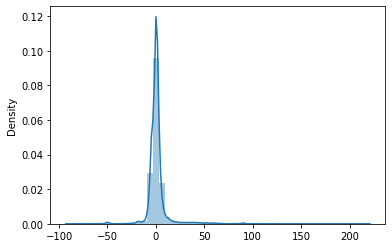

In [ ]:
import seaborn as sns

sns.distplot(yTrain)#this plot shows us that the data we has no skewness and the presence of outliers is very less

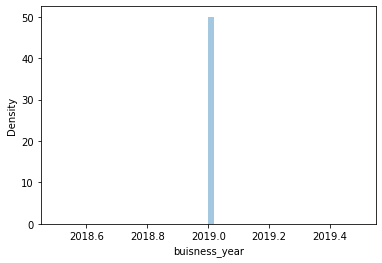

In [ ]:
sns.distplot(xTrain.buisness_year)

In [ ]:
xTrain.drop(labels = ['buisness_year'], axis = 1, inplace = True)#buisness year is a constant column and hence dropped
xTest.drop(labels = ['buisness_year'], axis = 1, inplace = True)#same as previous step
xVal.drop(labels = ['buisness_year'], axis = 1, inplace = True)#same as previous step

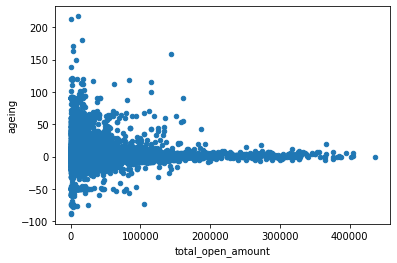

In [ ]:
temp = xTrain.merge(yTrain, on = xTrain.index)
temp.plot(kind='scatter', y='ageing', x='total_open_amount')#this plot shows us that with less open amount the delays can be high whereas for high amounts its is near the due date

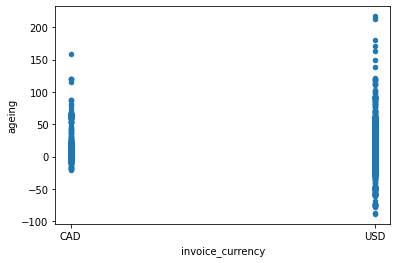

In [ ]:
temp.plot(kind='scatter', x='invoice_currency', y='ageing')#we have more obervation with usd currency than cad also ageing varies more on usd based rows 

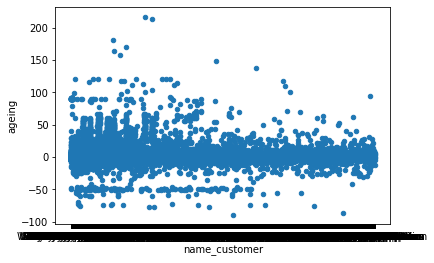

In [ ]:
temp.plot(kind='scatter', x='name_customer', y='ageing')#customer name may be an important feature

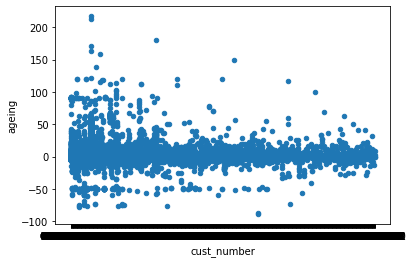

In [ ]:
temp.plot(kind='scatter', x='cust_number', y='ageing')#customernumber has a nearly identical delay habits with a few exceptions

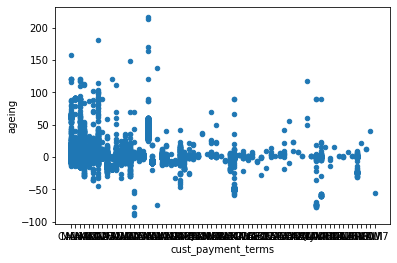

In [ ]:
temp.plot(kind='scatter', x='cust_payment_terms', y='ageing')#payment term greatky influences the delay as most are concentrated on same point with few exceptions

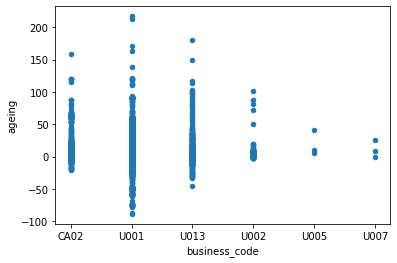

In [ ]:
temp.plot(kind='scatter', x='business_code', y='ageing')#business code has no effect on the delay as it is widely spread as seen here 

#Feature Engineering

In [ ]:
xTrain.info()#checking the features available and their type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31999 entries, 6944 to 40243
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         31999 non-null  object        
 1   cust_number           31999 non-null  object        
 2   name_customer         31999 non-null  object        
 3   clear_date            31999 non-null  datetime64[ns]
 4   posting_date          31999 non-null  datetime64[ns]
 5   document_create_date  31999 non-null  datetime64[ns]
 6   due_in_date           31999 non-null  datetime64[ns]
 7   invoice_currency      31999 non-null  object        
 8   total_open_amount     31999 non-null  float64       
 9   baseline_create_date  31999 non-null  datetime64[ns]
 10  cust_payment_terms    31999 non-null  object        
dtypes: datetime64[ns](5), float64(1), object(5)
memory usage: 2.9+ MB


**Date columns manipulation**

In [ ]:
#extracting day month year and quater out of the datetime columns
xTrain['postingDay'] = xTrain["posting_date"].apply(lambda x: x.day)
xTrain['postingMonth'] = xTrain["posting_date"].apply(lambda x: x.month)
xTrain['postingYear'] = xTrain["posting_date"].apply(lambda x: x.year)
xTrain['postingQuarter'] = xTrain['posting_date'].dt.quarter

xTrain['CreateDay'] = xTrain["document_create_date"].apply(lambda x: x.day)
xTrain['CreateMonth'] = xTrain["document_create_date"].apply(lambda x: x.month)
xTrain['CreateYear'] = xTrain["document_create_date"].apply(lambda x: x.year)
xTrain['CreateQuarter'] = xTrain['document_create_date'].dt.quarter

xTrain['dueDay'] = xTrain["due_in_date"].apply(lambda x: x.day)
xTrain['dueMonth'] = xTrain["due_in_date"].apply(lambda x: x.month)
xTrain['dueYear'] = xTrain["due_in_date"].apply(lambda x: x.year)
xTrain['dueQuarter'] = xTrain['due_in_date'].dt.quarter

xTrain['baselineCreateDay'] = xTrain["baseline_create_date"].apply(lambda x: x.day)
xTrain['baselineCreateMonth'] = xTrain["baseline_create_date"].apply(lambda x: x.month)
xTrain['baselineCreateYear'] = xTrain["baseline_create_date"].apply(lambda x: x.year)
xTrain['baselineQuarter'] = xTrain['baseline_create_date'].dt.quarter

xTrain.drop(labels = ['posting_date','document_create_date','due_in_date','baseline_create_date','clear_date'],axis = 1, inplace=True)
#test
xTest['postingDay'] = xTest["posting_date"].apply(lambda x: x.day)
xTest['postingMonth'] = xTest["posting_date"].apply(lambda x: x.month)
xTest['postingYear'] = xTest["posting_date"].apply(lambda x: x.year)
xTest['postingQuarter'] = xTest['posting_date'].dt.quarter

xTest['CreateDay'] = xTest["document_create_date"].apply(lambda x: x.day)
xTest['CreateMonth'] = xTest["document_create_date"].apply(lambda x: x.month)
xTest['CreateYear'] = xTest["document_create_date"].apply(lambda x: x.year)
xTest['CreateQuarter'] = xTest['document_create_date'].dt.quarter

xTest['dueDay'] = xTest["due_in_date"].apply(lambda x: x.day)
xTest['dueMonth'] = xTest["due_in_date"].apply(lambda x: x.month)
xTest['dueYear'] = xTest["due_in_date"].apply(lambda x: x.year)
xTest['dueQuarter'] = xTest['due_in_date'].dt.quarter

xTest['baselineCreateDay'] = xTest["baseline_create_date"].apply(lambda x: x.day)
xTest['baselineCreateMonth'] = xTest["baseline_create_date"].apply(lambda x: x.month)
xTest['baselineCreateYear'] = xTest["baseline_create_date"].apply(lambda x: x.year)
xTest['baselineQuarter'] = xTest['baseline_create_date'].dt.quarter

xTest.drop(labels = ['posting_date','document_create_date','due_in_date','baseline_create_date','clear_date'],axis = 1, inplace=True)

#Validation
xVal['postingDay'] = xVal["posting_date"].apply(lambda x: x.day)
xVal['postingMonth'] = xVal["posting_date"].apply(lambda x: x.month)
xVal['postingYear'] = xVal["posting_date"].apply(lambda x: x.year)
xVal['postingQuarter'] = xVal['posting_date'].dt.quarter

xVal['CreateDay'] = xVal["document_create_date"].apply(lambda x: x.day)
xVal['CreateMonth'] = xVal["document_create_date"].apply(lambda x: x.month)
xVal['CreateYear'] = xVal["document_create_date"].apply(lambda x: x.year)
xVal['CreateQuarter'] = xVal['document_create_date'].dt.quarter

xVal['dueDay'] = xVal["due_in_date"].apply(lambda x: x.day)
xVal['dueMonth'] = xVal["due_in_date"].apply(lambda x: x.month)
xVal['dueYear'] = xVal["due_in_date"].apply(lambda x: x.year)
xVal['dueQuarter'] = xVal['due_in_date'].dt.quarter

xVal['baselineCreateDay'] = xVal["baseline_create_date"].apply(lambda x: x.day)
xVal['baselineCreateMonth'] = xVal["baseline_create_date"].apply(lambda x: x.month)
xVal['baselineCreateYear'] = xVal["baseline_create_date"].apply(lambda x: x.year)
xVal['baselineQuarter'] = xVal['baseline_create_date'].dt.quarter

xVal.drop(labels = ['posting_date','document_create_date','due_in_date','baseline_create_date','clear_date'],axis = 1, inplace=True)

In [ ]:
xTrain.info(), xTest.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31999 entries, 6944 to 40243
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   business_code        31999 non-null  object 
 1   cust_number          31999 non-null  object 
 2   name_customer        31999 non-null  object 
 3   invoice_currency     31999 non-null  object 
 4   total_open_amount    31999 non-null  float64
 5   cust_payment_terms   31999 non-null  object 
 6   postingDay           31999 non-null  int64  
 7   postingMonth         31999 non-null  int64  
 8   postingYear          31999 non-null  int64  
 9   postingQuarter       31999 non-null  int64  
 10  CreateDay            31999 non-null  int64  
 11  CreateMonth          31999 non-null  int64  
 12  CreateYear           31999 non-null  int64  
 13  CreateQuarter        31999 non-null  int64  
 14  dueDay               31999 non-null  int64  
 15  dueMonth             31999 non-nu

(None, business_code             5
 cust_number             452
 name_customer          1245
 invoice_currency          2
 total_open_amount      3731
 cust_payment_terms       40
 postingDay               31
 postingMonth              2
 postingYear               1
 postingQuarter            1
 CreateDay                31
 CreateMonth               2
 CreateYear                1
 CreateQuarter             1
 dueDay                   31
 dueMonth                  7
 dueYear                   2
 dueQuarter                3
 baselineCreateDay        31
 baselineCreateMonth       4
 baselineCreateYear        2
 baselineQuarter           2
 dtype: int64)

**Encoding features**

In [ ]:
#encoding the non integer data types
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


businessCodeEnc = LabelEncoder()
businessCodeEnc.fit(xTrain['business_code'])

xTrain['business_code'] = businessCodeEnc.transform(xTrain['business_code'])
xTest['business_code'] = businessCodeEnc.transform(xTest['business_code'])
xVal['business_code'] = businessCodeEnc.transform(xVal['business_code'])

In [ ]:
#invoice curency contains only two categories and hence can be one hot encoded
xTrain = pd.concat([xTrain,pd.get_dummies(xTrain['invoice_currency'], prefix='invoice_currency')],axis=1)
xVal = pd.concat([xVal,pd.get_dummies(xVal['invoice_currency'], prefix='invoice_currency')],axis=1)
xTest = pd.concat([xTest,pd.get_dummies(xTest['invoice_currency'], prefix='invoice_currency')],axis=1)

xTrain.drop(labels = ['invoice_currency'],axis = 1, inplace=True)
xTest.drop(labels = ['invoice_currency'],axis = 1, inplace=True)
xVal.drop(labels = ['invoice_currency'],axis = 1, inplace=True)

In [ ]:
paymentTermsEnc = LabelEncoder()
paymentTermsEnc.fit(data['cust_payment_terms'])

xTrain['cust_payment_terms'] = paymentTermsEnc.transform(xTrain['cust_payment_terms'])
xTest['cust_payment_terms'] = paymentTermsEnc.transform(xTest['cust_payment_terms'])
xVal['cust_payment_terms'] = paymentTermsEnc.transform(xVal['cust_payment_terms'])

In [ ]:
customerNameEnc = LabelEncoder()
customerNameEnc.fit(data['name_customer'])

xTrain['name_customer'] = customerNameEnc.transform(xTrain['name_customer'])
xTest['name_customer'] = customerNameEnc.transform(xTest['name_customer'])
xVal['name_customer'] = customerNameEnc.transform(xVal['name_customer'])

In [ ]:
CustomerNumberEnc = LabelEncoder()
CustomerNumberEnc.fit(data['cust_number'])

xTrain['cust_number'] = CustomerNumberEnc.transform(xTrain['cust_number'])
xTest['cust_number'] = CustomerNumberEnc.transform(xTest['cust_number'])
xVal['cust_number'] = CustomerNumberEnc.transform(xVal['cust_number'])

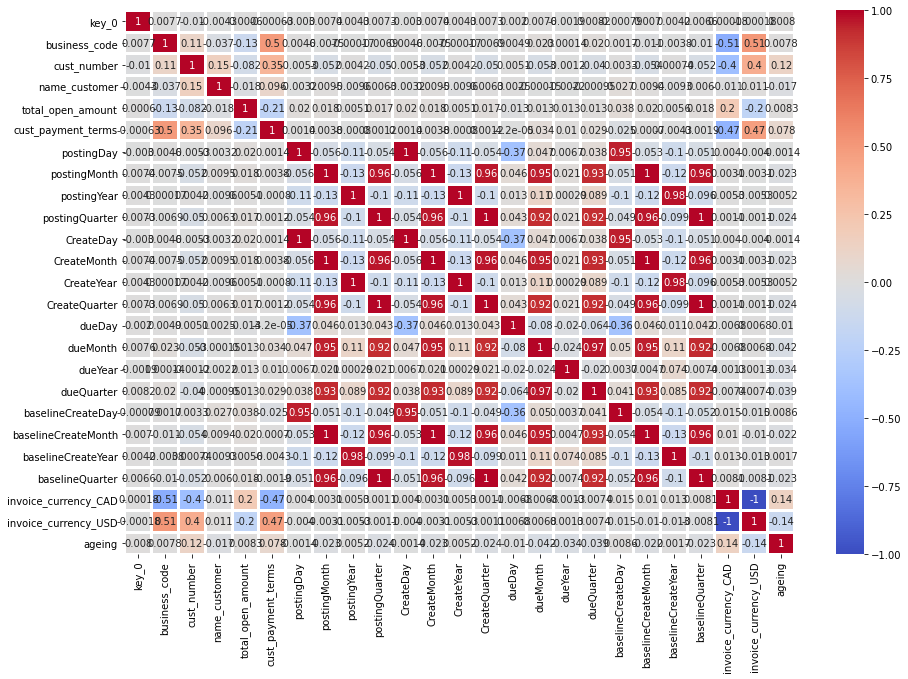

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

temp = xTrain.merge(yTrain, on = xTrain.index)#created temporary dataframe for visualization and analsis purpose only
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(temp.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)#no highly correlated features as can be seen

Identifying important features for decision tree regressor

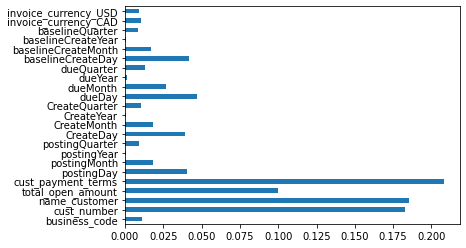

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
reg= ExtraTreesRegressor()
reg.fit(xTrain,yTrain)
reg.feature_importances_#this evatuates and gives us the significate vale of each feature on the ExtraTreesRegressor model the higher the better
feat_importances = pd.Series(reg.feature_importances_, index=xTrain.columns)
feat_importances.plot(kind='barh')
plt.show()#we can see the importance of available features on above model

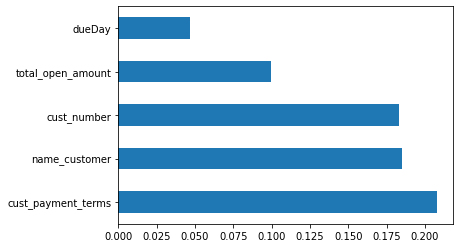

In [ ]:
feat_importances.nlargest(5).plot(kind='barh')#identifying and plotting 5 most important features

[04:20:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


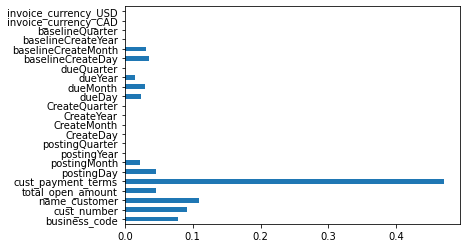

(None, array([0.07834766, 0.09175847, 0.10956895, 0.04643844, 0.4704471 ,
        0.04526963, 0.02290298, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02359173, 0.02949074,
        0.0150344 , 0.        , 0.03576798, 0.03138192, 0.        ,
        0.        , 0.        , 0.        ], dtype=float32))

In [ ]:
from xgboost.sklearn import XGBRegressor
s= XGBRegressor()
s.fit(xTrain,yTrain)
s.feature_importances_#this evatuates and gives us the significate vale of each feature on the XG boost model the higher the better
feat_importances = pd.Series(s.feature_importances_, index=xTrain.columns)
feat_importances.plot(kind='barh')
plt.show(), s.feature_importances_#plotting importance of each feature

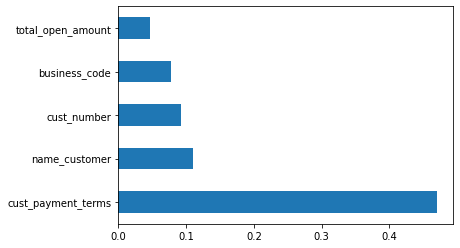

In [ ]:
feat_importances.nlargest(5).plot(kind='barh')#plotting top 5 features

In [ ]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31999 entries, 6944 to 40243
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         31999 non-null  int64  
 1   cust_number           31999 non-null  int64  
 2   name_customer         31999 non-null  int64  
 3   total_open_amount     31999 non-null  float64
 4   cust_payment_terms    31999 non-null  int64  
 5   postingDay            31999 non-null  int64  
 6   postingMonth          31999 non-null  int64  
 7   postingYear           31999 non-null  int64  
 8   postingQuarter        31999 non-null  int64  
 9   CreateDay             31999 non-null  int64  
 10  CreateMonth           31999 non-null  int64  
 11  CreateYear            31999 non-null  int64  
 12  CreateQuarter         31999 non-null  int64  
 13  dueDay                31999 non-null  int64  
 14  dueMonth              31999 non-null  int64  
 15  dueYear         

In [ ]:
#droping irrelevant features as highlighted by the steps above
xTrain.drop(labels=['invoice_currency_USD','invoice_currency_CAD','baselineQuarter','baselineCreateYear','baselineCreateMonth','dueMonth','dueYear','dueQuarter','CreateQuarter','CreateYear','CreateMonth','CreateDay','postingQuarter','postingYear','postingMonth','business_code','baselineCreateDay','postingDay'],axis = 1, inplace=True)
xVal.drop(labels=['invoice_currency_USD','invoice_currency_CAD','baselineQuarter','baselineCreateYear','baselineCreateMonth','dueMonth','dueYear','dueQuarter','CreateQuarter','CreateYear','CreateMonth','CreateDay','postingQuarter','postingYear','postingMonth','business_code','baselineCreateDay','postingDay'],axis = 1, inplace=True)
xTest.drop(labels=['invoice_currency_USD','invoice_currency_CAD','baselineQuarter','baselineCreateYear','baselineCreateMonth','dueMonth','dueYear','dueQuarter','CreateQuarter','CreateYear','CreateMonth','CreateDay','postingQuarter','postingYear','postingMonth','business_code','baselineCreateDay','postingDay'],axis = 1, inplace=True)

In [ ]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31999 entries, 6944 to 40243
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cust_number         31999 non-null  int64  
 1   name_customer       31999 non-null  int64  
 2   total_open_amount   31999 non-null  float64
 3   cust_payment_terms  31999 non-null  int64  
 4   dueDay              31999 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.5 MB


##MODELS

**Leniar Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
base = LinearRegression()
base.fit(xTrain,yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = base.predict(xVal)#predicting validation values of val set

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(yVal,y_predict, squared=False)#finding mean squared error b/w actual and predicted values

7.5095603919016805

**Lasso regression**

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(xTrain,yTrain)
y_predict3 = lasso.predict(xVal)
mean_squared_error(yVal,y_predict3, squared=False)

7.505547017482167

**Elastic-Net**

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(xTrain,yTrain)
y_predict4 = elastic.predict(xVal)
mean_squared_error(yVal,y_predict4, squared=False)

7.507138525238327

**Support Vector regression**

In [ ]:
from sklearn.svm import SVR

support vector hyperparameter tuning

In [ ]:
#find optimal hyperparameter values for the support vector using randomisedsearchcv module
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import reciprocal, uniform
#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
#support = SVR()
#support = RandomizedSearchCV(support, param_grid,refit=True,verbose=2)
#support.fit(xTrain,yTrain)
#y_predict2 = base.predict(xVal)

#print("Tuned SVR Parameters: {}".format(support.best_params_))
#print("Best score is {}".format(support.best_score_))

In [ ]:
support = SVR()
support.fit(xTrain,yTrain)
y_predict5 = support.predict(xVal)
mean_squared_error(yVal,y_predict5, squared=False)

7.407535066061726

**XGB Regressor**

In [ ]:
#find optimal hyperparameter values for the xg boost using randomisedsearchcv module
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(xTrain,
         yTrain)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:  1.5min finished


0.36496477927705645
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
xgb = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth= 6, min_child_weight= 4, n_estimators= 500, nthread= 4, objective= 'reg:linear', silent= 1, subsample= 0.7)
xgb.fit(xTrain,yTrain)
y_predict7 = xgb.predict(xVal)
mean_squared_error(yVal,y_predict7,squared=False)

6.138426263419953

**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=5,random_state=0)
regressor.fit(xTrain,yTrain)
y_predict2 = regressor.predict(xVal)
mean_squared_error(yVal,y_predict2,squared=False)

6.379928208452732

Decision tree regressor hyperparameter tuning

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}

tree = DecisionTreeRegressor()
tree = RandomizedSearchCV(tree, param_dist, cv = 5)
tree.fit(xTrain,yTrain)
#y_predict2 = base.predict(xVal)

print("Tuned Decision Tree Parameters: {}".format(tree.best_params_))
print("Best score is {}".format(tree.best_score_))
#mean_squared_error(yVal,y_predict2, squared=False)

Tuned Decision Tree Parameters: {'splitter': 'best', 'min_weight_fraction_leaf': 0.4, 'min_samples_leaf': 7, 'max_leaf_nodes': 90, 'max_features': 'auto', 'max_depth': 11}
Best score is 0.005460814164040184


In [ ]:
tree2 = DecisionTreeRegressor(max_depth=12,max_features=None,splitter='best',min_weight_fraction_leaf=0.3,min_samples_leaf=1,max_leaf_nodes=90)
tree2.fit(xTrain,yTrain)
y_predict2 = tree2.predict(xVal)
mean_squared_error(yVal,y_predict2, squared=False)

7.392818908468082

**Extra trees Regressor** 

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor ()
model.fit(xTrain,yTrain)
y_predict5 = model.predict(xVal)
mean_squared_error(yVal,y_predict2, squared=False)

7.392818908468082

##We select XGB as our final model


In [ ]:
y_predict_test = xgb.predict(xTest)
mean_squared_error(yTest, y_predict_test, squared=False)

7.692469590309233

##Preprocessing final test

In [ ]:
testData
temp = testData.copy()

In [ ]:
testData.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
dtype: int64

In [ ]:
testData.drop(labels = ['area_business','clear_date'], inplace = True, axis = 1)
testData.drop(labels = ['document type','posting_id'],axis = 1, inplace = True)
testData.drop(labels = ['invoice_id','doc_id'],axis = 1, inplace=True)
testData['baseline_create_date']= pd.to_datetime(testData['baseline_create_date'],format ="%Y%m%d")
testData['document_create_date']= pd.to_datetime(testData['document_create_date.1'],format ="%Y%m%d")
testData.drop(labels = ['document_create_date.1'], axis =1, inplace = True)
testData['due_in_date']= pd.to_datetime(testData['due_in_date'],format ="%Y%m%d")
testData['posting_date']= pd.to_datetime(testData['posting_date'],format ="%Y-%m-%d")
testData.drop(labels = ['buisness_year'], axis = 1, inplace = True)

In [ ]:
buff = testData.due_in_date
testData['dueDay'] = testData["due_in_date"].apply(lambda x: x.day)

In [ ]:
testData['business_code'] = businessCodeEnc.transform(testData['business_code'])
testData['cust_payment_terms'] = paymentTermsEnc.fit_transform(testData['cust_payment_terms'])
testData['name_customer'] = customerNameEnc.fit_transform(testData['name_customer'])
testData['cust_number'] = CustomerNumberEnc.fit_transform(testData['cust_number'])

In [ ]:
testData

,business_code,cust_number,name_customer,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,dueDay
1,1,477,1304,2020-03-26,2020-03-26,2020-04-15,USD,1583.88,2020-03-26,21,15
14,1,454,377,2020-04-02,2020-04-02,2020-04-17,USD,40455.53,2020-04-02,13,17
16,1,398,1718,2020-03-25,2020-03-25,2020-04-09,USD,267.30,2020-03-25,26,9
23,1,398,1725,2020-04-02,2020-04-02,2020-04-17,USD,6039.48,2020-04-02,26,17
26,0,142,1452,2020-04-16,2020-04-16,2020-04-26,CAD,4974.10,2020-04-16,1,26
...,...,...,...,...,...,...,...,...,...,...,...
49972,1,360,1600,2020-03-27,2020-03-27,2020-04-11,USD,32027.19,2020-03-27,11,11
49985,0,539,1712,2020-04-14,2020-04-14,2020-04-25,CAD,3596.25,2020-04-15,1,25
49987,1,101,121,2020-03-27,2020-03-27,2020-04-26,USD,53403.84,2020-03-27,23,26
49992,1,432,539,2020-04-01,2020-04-01,2020-04-16,USD,43692.68,2020-04-01,11,16


In [ ]:
testData = testData[['cust_number', 'name_customer','total_open_amount','cust_payment_terms','dueDay']]

In [ ]:
testData

,cust_number,name_customer,total_open_amount,cust_payment_terms,dueDay
1,477,1304,1583.88,21,15
14,454,377,40455.53,13,17
16,398,1718,267.30,26,9
23,398,1725,6039.48,26,17
26,142,1452,4974.10,1,26
...,...,...,...,...,...
49972,360,1600,32027.19,11,11
49985,539,1712,3596.25,1,25
49987,101,121,53403.84,23,26
49992,432,539,43692.68,11,16


##Predicting Missing Values

In [ ]:
testDataPrediction = xgb.predict(testData)

In [ ]:
testDataPrediction = testDataPrediction.astype(int)


In [ ]:
testDataPrediction = pd.DataFrame(testDataPrediction, columns=['ageing'])

In [ ]:
li = []
for i in testDataPrediction.ageing:
    if(i<=0):
        li.append('<0')
    elif(i>0 and i<=15):
        li.append('1-15')
    elif(i>15 and i<=30):
        li.append('16-30')
    elif(i>30 and i<=45):
        li.append('31-45')
    elif(i>45 and i<=65):
        li.append('46-65')
    else:
        li.append('<65')

In [ ]:
testDataPrediction['bucket'] = pd.DataFrame(li, columns=['bucket'])

In [ ]:
testDataPrediction

,ageing,bucket
0,-3,<0
1,-4,<0
2,1,1-15
3,1,1-15
4,-8,<0
...,...,...
9995,1,1-15
9996,-7,<0
9997,1,1-15
9998,0,<0


In [ ]:
from datetime import datetime, timedelta
testDataPrediction['ageing'] = [timedelta(i) for i in testDataPrediction.ageing]

In [ ]:
testDataPrediction

,ageing,bucket
0,-3 days,<0
1,-4 days,<0
2,1 days,1-15
3,1 days,1-15
4,-8 days,<0
...,...,...
9995,1 days,1-15
9996,-7 days,<0
9997,1 days,1-15
9998,0 days,<0


In [ ]:
counter = 0
for i in buff.index:
  buff[i] = buff[i] + testDataPrediction.ageing[counter]
  counter+=1

In [ ]:
predicted_date = buff

In [ ]:
type(predicted_date)

pandas.core.series.Series

In [ ]:
predicted_date = predicted_date.to_frame()
predicted_date = predicted_date.reset_index()

In [ ]:
predicted_date.drop(labels=['index'],axis=1,inplace=True)

In [ ]:
predicted_date

,due_in_date
0,2020-04-12
1,2020-04-13
2,2020-04-10
3,2020-04-18
4,2020-04-18
...,...
9995,2020-04-12
9996,2020-04-18
9997,2020-04-27
9998,2020-04-16


In [ ]:
testDataPrediction['due_in_date'] = predicted_date['due_in_date']

In [ ]:
temp = temp.reset_index()

In [ ]:
temp['ageing'] = testDataPrediction['ageing']
temp['bucket'] = testDataPrediction['bucket']
temp['predicted_date'] = testDataPrediction['due_in_date']

In [ ]:
temp['due_in_date']= pd.to_datetime(temp['due_in_date'],format ="%Y%m%d")

In [ ]:
temp.nunique()

index                     10000
business_code                 5
cust_number                 661
name_customer              1780
clear_date                    0
buisness_year                 1
doc_id                     9735
posting_date                 84
document_create_date         88
document_create_date.1       84
due_in_date                 127
invoice_currency              2
document type                 1
posting_id                    1
area_business                 0
total_open_amount          9083
baseline_create_date         86
cust_payment_terms           41
invoice_id                 9735
ageing                       37
bucket                        3
predicted_date              130
dtype: int64

In [ ]:
temp.drop_duplicates(subset ="invoice_id", inplace = True)

In [ ]:
temp.nunique()

index                     9735
business_code                5
cust_number                661
name_customer             1780
clear_date                   0
buisness_year                1
doc_id                    9735
posting_date                84
document_create_date        88
document_create_date.1      84
due_in_date                127
invoice_currency             2
document type                1
posting_id                   1
area_business                0
total_open_amount         9083
baseline_create_date        86
cust_payment_terms          41
invoice_id                9735
ageing                      37
bucket                       3
predicted_date             130
dtype: int64

##Output in .csv

In [ ]:
temp

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,ageing,bucket,predicted_date
0,1,U001,0200865666,RESTAU,NaN,2020.0,1.930709e+09,2020-03-26,20200326,20200326,2020-04-15,USD,RV,1.0,NaN,1583.88,20200326.0,NAD1,1.930709e+09,-3 days,<0,2020-04-12
1,14,U001,0200794332,COST co,NaN,2020.0,1.930718e+09,2020-04-02,20200329,20200402,2020-04-17,USD,RV,1.0,NaN,40455.53,20200402.0,NAAX,1.930718e+09,-4 days,<0,2020-04-13
2,16,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930686e+09,2020-03-25,20200324,20200325,2020-04-09,USD,RV,1.0,NaN,267.30,20200325.0,NAH4,1.930686e+09,1 days,1-15,2020-04-10
3,23,U001,0200769623,WAL-MAR systems,NaN,2020.0,1.930733e+09,2020-04-02,20200403,20200402,2020-04-17,USD,RV,1.0,NaN,6039.48,20200402.0,NAH4,1.930733e+09,1 days,1-15,2020-04-18
4,26,CA02,0140104440,SO foundation,NaN,2020.0,2.960628e+09,2020-04-16,20200416,20200416,2020-04-26,CAD,RV,1.0,NaN,4974.10,20200416.0,CA10,2.960628e+09,-8 days,<0,2020-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,49965,U001,0200759878,SA foundation,NaN,2020.0,1.930740e+09,2020-04-05,20200403,20200405,2020-04-20,USD,RV,1.0,NaN,62802.42,20200405.0,NAH4,1.930740e+09,0 days,<0,2020-04-20
9995,49972,U001,0200744019,TARG systems,NaN,2020.0,1.930710e+09,2020-03-27,20200327,20200327,2020-04-11,USD,RV,1.0,NaN,32027.19,20200327.0,NAA8,1.930710e+09,1 days,1-15,2020-04-12
9996,49985,CA02,140106408,WAL-M in,NaN,2020.0,2.960628e+09,2020-04-14,20200414,20200414,2020-04-25,CAD,RV,1.0,NaN,3596.25,20200415.0,CA10,2.960628e+09,-7 days,<0,2020-04-18
9998,49992,U001,0200783734,FAREW systems,NaN,2020.0,1.930732e+09,2020-04-01,20200402,20200401,2020-04-16,USD,RV,1.0,NaN,43692.68,20200401.0,NAA8,1.930732e+09,0 days,<0,2020-04-16


In [ ]:
temp.isna().sum()

index                        0
business_code                0
cust_number                  0
name_customer                0
clear_date                9735
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
area_business             9735
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   0
ageing                       0
bucket                       0
predicted_date               0
dtype: int64

In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9735 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   index                   9735 non-null   int64          
 1   business_code           9735 non-null   object         
 2   cust_number             9735 non-null   object         
 3   name_customer           9735 non-null   object         
 4   clear_date              0 non-null      object         
 5   buisness_year           9735 non-null   float64        
 6   doc_id                  9735 non-null   float64        
 7   posting_date            9735 non-null   object         
 8   document_create_date    9735 non-null   int64          
 9   document_create_date.1  9735 non-null   int64          
 10  due_in_date             9735 non-null   datetime64[ns] 
 11  invoice_currency        9735 non-null   object         
 12  document type           9735 non-n

In [ ]:
temp['baseline_create_date']= pd.to_datetime(temp['baseline_create_date'],format ="%Y%m%d")
temp['document_create_date']= pd.to_datetime(temp['document_create_date.1'],format ="%Y%m%d")
temp['due_in_date']= pd.to_datetime(temp['due_in_date'],format ="%Y%m%d")
temp['posting_date']= pd.to_datetime(temp['posting_date'],format ="%Y-%m-%d")
temp['clear_date'] = pd.to_datetime(temp.clear_date)

In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9735 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   index                   9735 non-null   int64          
 1   business_code           9735 non-null   object         
 2   cust_number             9735 non-null   object         
 3   name_customer           9735 non-null   object         
 4   clear_date              0 non-null      datetime64[ns] 
 5   buisness_year           9735 non-null   float64        
 6   doc_id                  9735 non-null   float64        
 7   posting_date            9735 non-null   datetime64[ns] 
 8   document_create_date    9735 non-null   datetime64[ns] 
 9   document_create_date.1  9735 non-null   int64          
 10  due_in_date             9735 non-null   datetime64[ns] 
 11  invoice_currency        9735 non-null   object         
 12  document type           9735 non-n

In [ ]:
temp.drop(labels=['clear_date','area_business','index'],axis=1,inplace=True)

In [ ]:
compression_opts = dict(method='zip',archive_name='out.csv')  
temp.to_csv('out.zip', index=False,compression=compression_opts) 


In [ ]:
temp.isna().sum()

business_code             0
cust_number               0
name_customer             0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
ageing                    0
bucket                    0
predicted_date            0
dtype: int64